In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Load dataset
file_path = "C:\\Users\\Baviskar\\Downloads\\delhiaqi.csv"
aqi_df = pd.read_csv(file_path)

In [4]:
# Clean column names (remove leading/trailing spaces)
aqi_df.columns = aqi_df.columns.str.strip()

In [9]:
aqi_df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [5]:
# Display basic info
print("Initial Data Info:")
print(aqi_df.info())
print("\nMissing Values:")
print(aqi_df.isnull().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB
None

Missing Values:
date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [6]:
 aqi_df.dropna(inplace=True)

In [7]:
# Convert 'date' column to datetime
if 'date' in aqi_df.columns:
    aqi_df['date'] = pd.to_datetime(aqi_df['date'], errors='coerce')
    aqi_df.dropna(subset=['date'], inplace=True)  # Remove rows with invalid dates
    aqi_df.sort_values(by='date', inplace=True)
else:
    print("Warning: 'date' column not found!")

In [12]:
# Check if PM2.5 exists
if 'pm2_5' not in aqi_df.columns:
    raise KeyError("The required column 'PM2.5' is not found in the dataset!")

In [13]:
# Define AQI computation function
def compute_aqi_pm25(concentration):
    if concentration <= 30:
        return 50 * concentration / 30
    elif concentration <= 60:
        return 50 + (100 - 50) * (concentration - 30) / (60 - 30)
    elif concentration <= 90:
        return 100 + (200 - 100) * (concentration - 60) / (90 - 60)
    elif concentration <= 120:
        return 200 + (300 - 200) * (concentration - 90) / (120 - 90)
    elif concentration <= 250:
        return 300 + (400 - 300) * (concentration - 120) / (250 - 120)
    else:
        return 400 + (500 - 400) * (concentration - 250) / (380 - 250)

In [15]:
# Compute AQI and clip values
aqi_df['AQI_PM25'] = aqi_df['pm2_5'].apply(compute_aqi_pm25)
aqi_df['AQI'] = aqi_df['AQI_PM25'].clip(lower=0, upper=500)

In [17]:
# Categorize AQI
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

In [18]:
aqi_df['Category'] = aqi_df['AQI'].apply(categorize_aqi)


In [19]:
# Display cleaned sample
print("\nCleaned Data Sample:")
print(aqi_df.head())


Cleaned Data Sample:
                 date       co     no    no2    o3    so2   pm2_5    pm10  \
0 2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1 2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2 2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3 2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4 2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3    AQI_PM25         AQI   Category  
0   5.83  337.915385  337.915385  Very Poor  
1   7.66  348.338462  348.338462  Very Poor  
2  11.40  377.115385  377.115385  Very Poor  
3  13.55  402.230769  402.230769     Severe  
4  14.19  412.584615  412.584615     Severe  


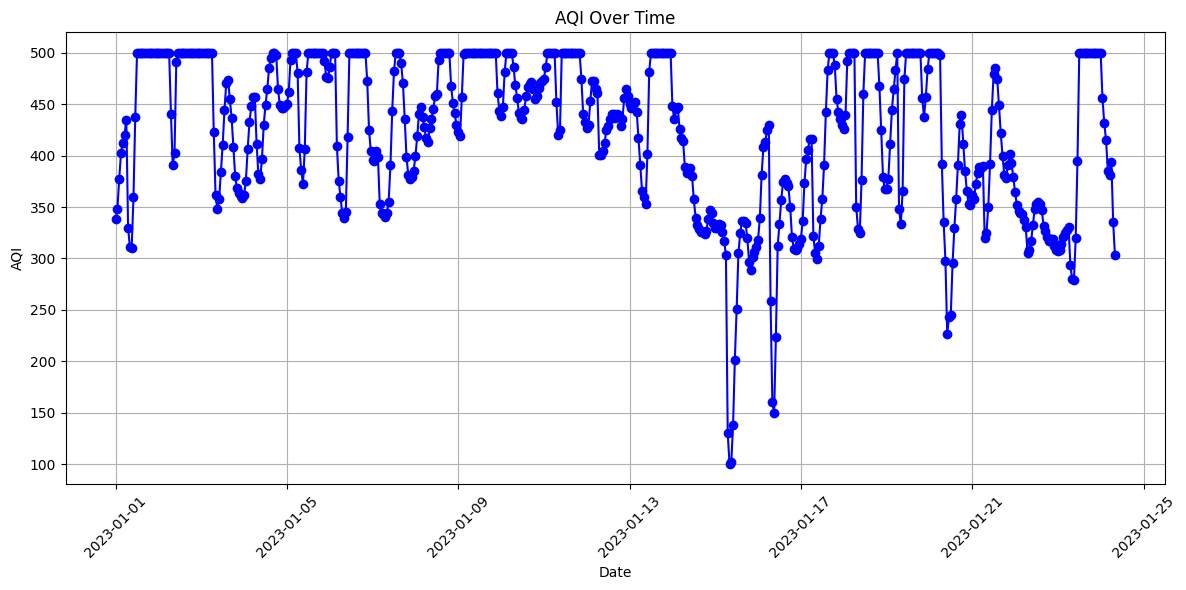

In [20]:
# Plot AQI over time
plt.figure(figsize=(12, 6))
plt.plot(aqi_df['date'], aqi_df['AQI'], marker='o', linestyle='-', color='blue')
plt.title('AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Category', ylabel='count'>

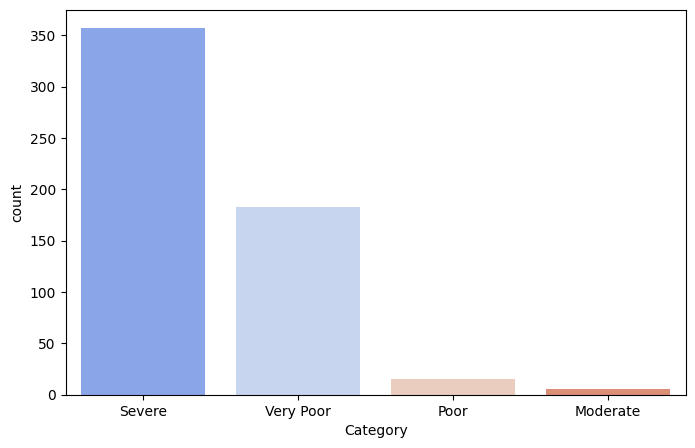

In [21]:
# Plot AQI category distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=aqi_df, x='Category', palette='coolwarm', order=aqi_df['Category'].value_counts().index)

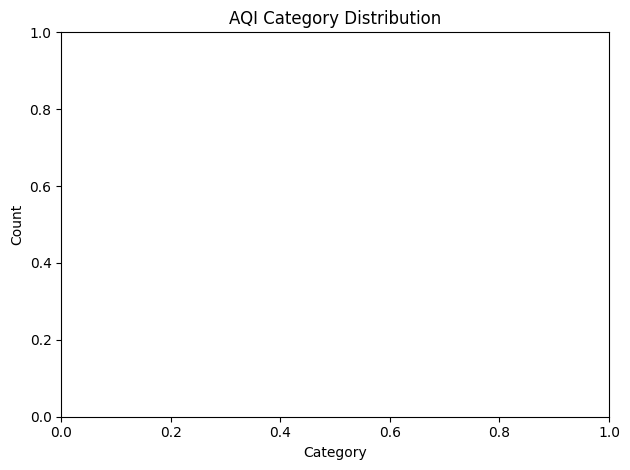

In [25]:
# Add counts on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=9, color='black')
plt.title('AQI Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()